<a href="https://colab.research.google.com/github/HarshJain41/Global-Terrorism-Data-Analysis/blob/main/Harsh_Jain_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

## Importing The Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading The Dataset and checking its shape

In [26]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter Canberra/Module 1 - Python For Data Science/Capstone Project 1 - EDA on Global Terrorism/Copy of Global Terrorism Data.csv', encoding = 'latin1', low_memory = False)
# encoding  = 'latin1' is because of big dataset

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [29]:
df.shape

(181691, 135)

In [30]:
# Here we have 135 columns, let's see what are they
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [31]:
df.isnull().sum().values  ###The values in the array are the count of null values that each column have.

array([     0,      0,      0,      0, 172452,      0, 179471,      0,
            0,      0,      0,    421,    434,   4556,   4557,      6,
            0, 126196,  66129,      0,      0,      0,      1, 152680,
       152680,      1,      0,      0,      0,      0, 175377, 175377,
       181263, 181263,      0,      0,  10373,  10373,  42550,    636,
         1559,   1559, 170547, 170547, 171006, 171006, 171574, 170671,
       170863, 170863, 180515, 180515, 180594, 180594, 180665, 180516,
       180544, 180544,      0, 175801, 179678, 181531, 181367, 181671,
       131130,    380, 179736, 181371,      0,  71115,  69489,  66120,
       162608, 162608, 179801, 181075, 181075, 181373, 181558, 181558,
       176852,      0,      0,  20768,  20768, 168564, 168564, 170149,
       170149, 179828, 179828, 179998, 179998, 181618, 181618, 181621,
       181621,  67670,  10313,  64446,  66958,  16311,  64702,  69143,
            0, 117626, 117626, 142702, 123732,    178, 168119, 168174,
      

### It looks like many of these columns are of no use, and have many null values in them. So, In next step we will filter out the most important columns for our data analysis.

## Filtering the Culumns - 
#### Here I've created a new dataframe that contains only those columns that seems important for data analysis.

In [32]:
new_df = df[['iyear', 'imonth', 'iday', 'provstate',
                     'country_txt', 'region_txt',
                     'city', 'latitude', 'longitude', 'location', 'summary', 'success', 'suicide', 'attacktype1_txt',
                      'targtype1_txt', 'gname', 'weaptype1_txt', 'nkill', 'nwound', 'motive']]

In [33]:
#Renaming the Column Names-:

new_df = new_df.rename(columns = {'iyear':'year', 'imonth':'month', 
                                   'iday': 'day', 'country_txt':'country', 'region_txt':'region', 'provstate':'state',          
                                   'city': 'city', 'latitude':'Latitude', 'longitude':'Longitude', 
                                   'location':'location', 'summary':'Summary', 'success':'Success', 'suicide':'Suicide',
                                   'attacktype1_txt':'attack_type', 'targtype1_txt':'target_type', 
                                   'gname':'group_name', 'weaptype1_txt':'weapon_type', 'nkill':'killed',
                                   'nwound':'wounded', 'motive':'Motive'})

In [34]:
new_df.head()

,year,month,day,state,country,region,city,Latitude,Longitude,location,Summary,Success,Suicide,attack_type,target_type,group_name,weapon_type,killed,wounded,Motive
0,1970,7,2,NaN,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,NaN,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0,NaN
1,1970,0,0,Federal,Mexico,North America,Mexico city,19.371887,-99.086624,NaN,NaN,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0,NaN
2,1970,1,0,Tarlac,Philippines,Southeast Asia,Unknown,15.478598,120.599741,NaN,NaN,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0,NaN
3,1970,1,0,Attica,Greece,Western Europe,Athens,37.997490,23.762728,NaN,NaN,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN,NaN
4,1970,1,0,Fukouka,Japan,East Asia,Fukouka,33.580412,130.396361,NaN,NaN,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN,NaN


In [35]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   state        181270 non-null  object 
 4   country      181691 non-null  object 
 5   region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   location     55495 non-null   object 
 10  Summary      115562 non-null  object 
 11  Success      181691 non-null  int64  
 12  Suicide      181691 non-null  int64  
 13  attack_type  181691 non-null  object 
 14  target_type  181691 non-null  object 
 15  group_name   181691 non-null  object 
 16  weapon_type  181691 non-null  object 
 17  killed       171378 non-null  float64
 18  wounded      165380 non-

In [36]:
new_df.isnull().sum()

year                0
month               0
day                 0
state             421
country             0
region              0
city              434
Latitude         4556
Longitude        4557
location       126196
Summary         66129
Success             0
Suicide             0
attack_type         0
target_type         0
group_name          0
weapon_type         0
killed          10313
wounded         16311
Motive         131130
dtype: int64

In [37]:
# Here, I've added a new column called Casualty to collect statistics on the overall number of persons affected by terrorist attacks for each observation.

new_df["killed"] = new_df['killed'].fillna(0)
new_df["wounded"] = new_df["wounded"].fillna(0)
new_df["Casuality"] = new_df["killed"]+new_df["wounded"]


In [38]:
new_df.head()

,year,month,day,state,country,region,city,Latitude,Longitude,location,...,Success,Suicide,attack_type,target_type,group_name,weapon_type,killed,wounded,Motive,Casuality
0,1970,7,2,NaN,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,...,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0,NaN,1.0
1,1970,0,0,Federal,Mexico,North America,Mexico city,19.371887,-99.086624,NaN,...,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0,NaN,0.0
2,1970,1,0,Tarlac,Philippines,Southeast Asia,Unknown,15.478598,120.599741,NaN,...,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0,NaN,1.0
3,1970,1,0,Attica,Greece,Western Europe,Athens,37.997490,23.762728,NaN,...,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,0.0,0.0,NaN,0.0
4,1970,1,0,Fukouka,Japan,East Asia,Fukouka,33.580412,130.396361,NaN,...,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,0.0,0.0,NaN,0.0


In [39]:
new_df.describe()

,year,month,day,Latitude,Longitude,Success,Suicide,killed,wounded,Casuality
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.889598,0.036507,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.313391,0.187549,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,0.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1.000000,1570.000000,8191.000000,9574.000000


# Observation Till Now:


1.   Maximum number of People killed in an event were - 1570
2.   Maximum number of People wounded in an event were - 8191
3.   Maximum number of casualities in an event were - 9574




## 1. Yearwise Visualisation

In [40]:
attacks = new_df['year'].value_counts(dropna = False).sort_index().reset_index().rename(columns = {'index':'Year', 'year':'Attacks'}).set_index('Year')

In [41]:
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


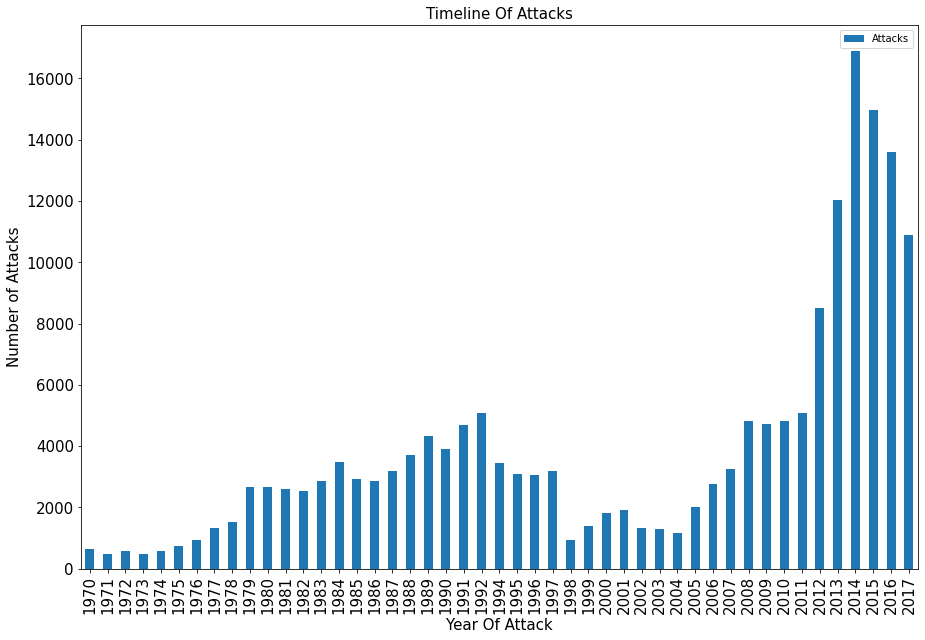

In [42]:
#Plotting the bar graph between the years and number of attacks each year
attacks.plot(kind = 'bar', figsize = (15,10), fontsize = 15)
plt.title('Timeline Of Attacks', fontsize = 15)
plt.xlabel('Year Of Attack', fontsize = 15)
plt.ylabel('Number of Attacks', fontsize = 15)
plt.show()

#### Here, from the above visualisation we can see that Maximum Number of Attacks happened in the year of 2014, i.e. 16903. And the minimum Number of Attacks happened in the year of 1971, i.e. 471.

In [43]:
casualities = new_df[["year","Casuality"]].groupby("year").sum()

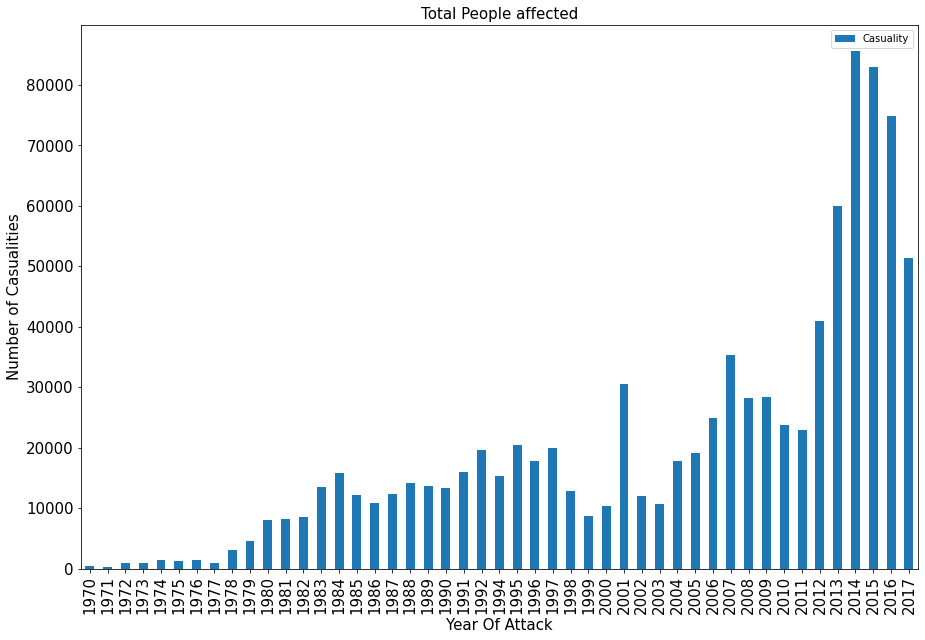

In [44]:
casualities.plot(kind = 'bar', figsize = (15,10), fontsize = 15)
plt.title('Total People affected', fontsize = 15)
plt.xlabel('Year Of Attack', fontsize = 15)
plt.ylabel('Number of Casualities', fontsize = 15)
plt.show()

#### It can also be seen that while 2014 was the year with the most attacks, it was also the year with the most casualties.

## 2. Correlation Analysis

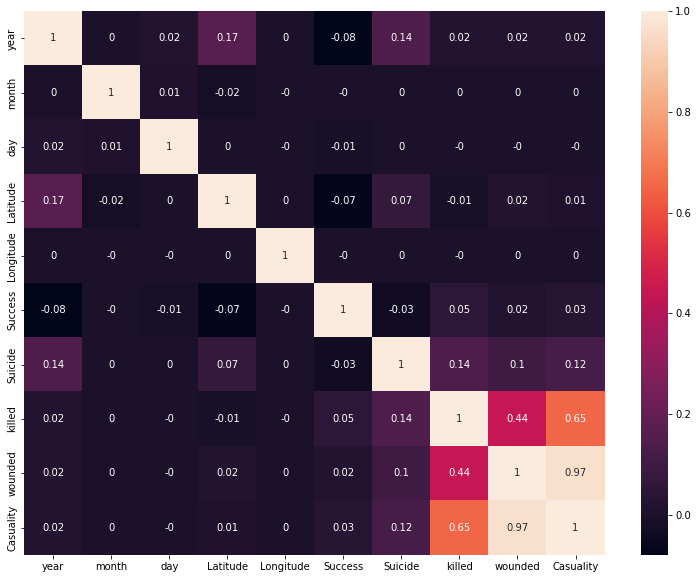

In [45]:
plt.figure(figsize = (13,10))
#This will show how much one parameter is related to the other in our data
sns.heatmap(np.round(new_df.corr(), 2), annot = True)  #np.round is used to round the values of correlation to 2 decimal points

#### Here we can see that wounded and Casuality are highly correlated i.e. = 97%
#### And killed and Casuality are second highly correlated values i.e. 65%
#### killed and wounded are 2 values with correlation 44%

## 3. Terrorist Activities in each Region through Area Plot

In [46]:
region = pd.crosstab(new_df.year,new_df.region)
region.head()

region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


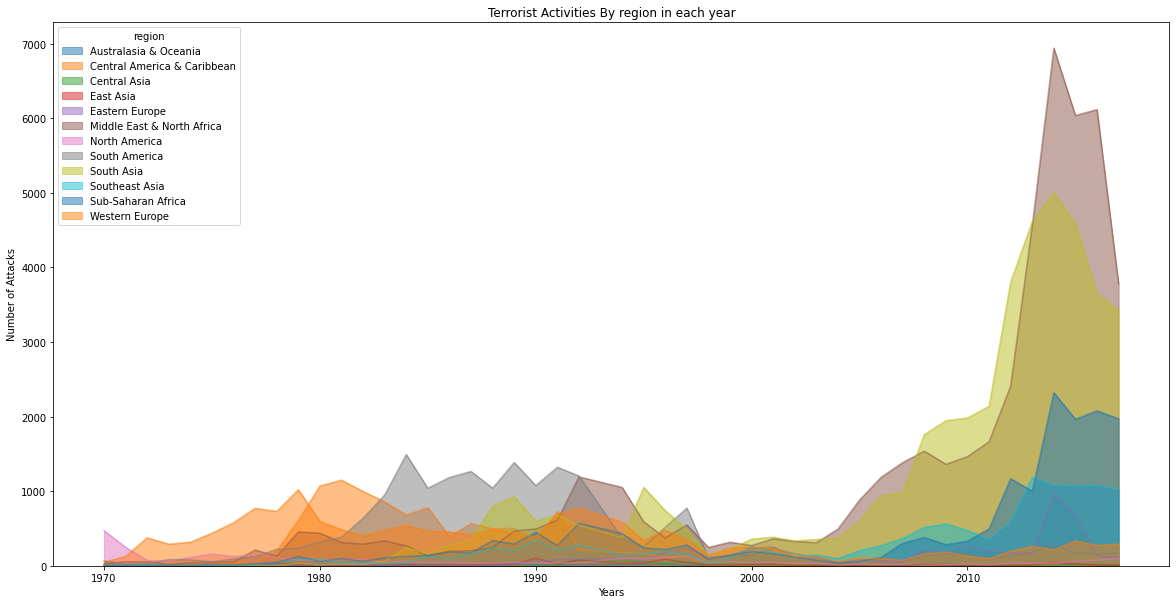

In [47]:
region.plot(kind = 'area', stacked = False, figsize = (20,10))
plt.title('Terrorist Activities By region in each year')
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.show()

#### According to the plot above, there is a peak increase in attacks after 2010 in almost every region, with the Middle East and North African nations topping the list due to the highest number of attacks, and then comes South asian countries at the second position.

#### Middle East and South Asian Countries - Algeria, Bahrain, Egypt, Iran, Iraq, Israel, Jordan, Kuwait, Lebanon, Libya, Morocco, Oman, Qatar, Saudi Arabia, Syria, Tunisia, United Arab Emirates and Yemen.

#### South Asian Countries - Afghanistan, Bangladesh, Bhutan, India, Iran, Maldives, Nepal, Pakistan, and Sri Lanka.